# Continuous Control

---

This notebook is for training an agent using an implementation of the DDPG algorithm to solve a continuous control task. The task uses the Unity agents [reacher environment](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Learning-Environment-Examples.md#reacher) and involves tracking a ball using a simulated robotic reacher arm with two actuating motors.

### 1. Setting up the Environment
----

Firstly we will set up the Unity reacher environment. Please make sure you are running a Python 3.6 kernel for this notebook. 

In [1]:
import sys
if not (sys.version_info[0] == 3 and sys.version_info[1] == 6):
    raise Exception("This notebook must be run with Python 3.6 to allow unityagents package to work correctly.")

from unityagents import UnityEnvironment
from DDPG_reacher_final import DDPGAgent, ActorNetwork, CriticNetwork, train_DDPG_agent, load_agent, test_agent, check_solved
import numpy as np

# %load_ext autoreload
# %autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd

device =  cpu


To load the environment please download the correct Unity environment for your OS using the following links. 

- Linux: [click here](https://s3-us-west-1.amazonaws.com/udacity-drlnd/P2/Reacher/one_agent/Reacher_Linux.zip)
- Linux (Headless): [click here](https://s3-us-west-1.amazonaws.com/udacity-drlnd/P2/Reacher/one_agent/Reacher_Linux_NoVis.zip)
- Mac OSX: [click here](https://s3-us-west-1.amazonaws.com/udacity-drlnd/P2/Reacher/one_agent/Reacher.app.zip)
- Windows (32-bit): [click here](https://s3-us-west-1.amazonaws.com/udacity-drlnd/P2/Reacher/one_agent/Reacher_Windows_x86.zip)
- Windows (64-bit): [click here](https://s3-us-west-1.amazonaws.com/udacity-drlnd/P2/Reacher/one_agent/Reacher_Windows_x86_64.zip)

Once downloaded change the `path` to match the location of the environment that you downloaded.

<strong>Note: only run the following cell once. If the Unity environment has been closed or crashed please restart the kernel. <strong/>

In [ ]:
path = "Reacher.app"
env = UnityEnvironment(file_name=path)

### 2. Training Model
In this section you are able to train a model from scratch using different hyperparameters and neural architectures.

In [ ]:
# Collecting parameter information from the Unity environment
brain_name = env.brain_names[0]
env_info = env.reset(train_mode=True)[brain_name]
brain = env.brains[brain_name]

The next cells allows you to define hyperparameters and different network architectures to for the model to use.


In [ ]:
# Hyperparameter setting
buffer_size=10000
seed=np.random.randint(1000)

state_size=env_info.vector_observations.shape[1]
action_size=brain.vector_action_space_size

hidden_layers_actor=[256,128]

hidden_layers_critic=[256,128,32]

gamma=0.95
tau=0.0003

noise_decay  = 0.9995
min_noise  = 0.05
l2_decay=0.

learning_rate_actor=0.0003
learning_rate_critic=0.0001

actor_net =  ActorNetwork(state_size, action_size, hidden_layers_actor)
critic_net = CriticNetwork(state_size, action_size, hidden_layers_critic)

#priority replay parameter settings settings
prioritised_replay_buffer = True
alpha = 0.7
beta = 0.1
beta_increment_size = 0.0001
base_priority = 0.1
max_priority = 1.

In [ ]:
#Creates agent with above hyperparameters.
agent = DDPGAgent(
        buffer_size,
        seed,
        state_size,
        action_size,
        actor_net,
        critic_net,
        gamma,
        tau,
        l2_decay,
        learning_rate_actor,
        learning_rate_critic,
        noise_decay,
        min_noise,
        prioritised_replay_buffer,
        alpha,
        beta,
        beta_increment_size,
        base_priority,
        max_priority,
)

Finally run this cell to train the currently loaded model.

In [ ]:
# Commence training process
no_training_episodes = 1
experiance_batch_size = 128
save_name = "New_model.pth" # choose a name for the model (eg DDPGagent.pth)
save_path = ""  # choose a path to save the best and final models, leave blank for current dir.
print_every = 5

scores = train_DDPG_agent(agent, env, episodes= no_training_episodes, batch_size = experiance_batch_size, name=save_name, path=save_path, print_every=print_every)
print(scores)

### 3. Loading Saved Model
----

Use this section to reload a previously saved model.



In [2]:
agent_path = "Final_agent.pth" # Trained_agents/double_per_tuned.pth is an agent trained to solve the environment
agent = load_agent(agent_path)
# agent.save_agent("Final_Agent_2.pth")

using PER
Agent loaded with parameters: 
 {'buffer_size': 10000, 'seed': 349, 'prioritised_replay_buffer': True, 'alpha': 0.7, 'beta': 0.2, 'beta_increment_size': 0.0001, 'base_priority': 0.1, 'max_priority': 1, 'replay_buffer': <replay_buffers.PrioritisedReplayBuffer object at 0x105ab2198>, 'state_size': 33, 'action_size': 4, 'actor_net': ActorNetwork(
  (input): Linear(in_features=33, out_features=256, bias=True)
  (hidden_layers): ModuleList(
    (0): Linear(in_features=256, out_features=128, bias=True)
  )
  (output): Linear(in_features=128, out_features=4, bias=True)
), 'actor_target': ActorNetwork(
  (input): Linear(in_features=33, out_features=256, bias=True)
  (hidden_layers): ModuleList(
    (0): Linear(in_features=256, out_features=128, bias=True)
  )
  (output): Linear(in_features=128, out_features=4, bias=True)
), 'actor_optimizer': Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.0003
    weight_decay: 0
), 'critic_net': CriticNe

### 4. Model Testing
----

The next cell will run the agent in evaluation mode and save the episode scores. If you would like to watch the agents actions set `quick_view` to `False`.

In [ ]:
test_episode_number = 1
print_scores = True
quick_view = False
test_scores = test_agent(agent, env, test_episode_number, print_scores, quick_view)
print(test_scores)

### 5. Model Evaluation
----
In this section we can create graphs to evaluate the models training process and how it preforms during training as well as checking if the environment has been solved which is defined as achieving an average score of $\gt30$ over a $100$ consecutive episodes.
The following cell closes the unity environment, converts the agent's training scores into a Panda series for easy analysis and increases plot size.

In [3]:
# env.close()
train_scores = pd.Series(agent.episode_scores)
plt.rcParams['figure.dpi'] = 150


The following block creates a graph showing the episodic scores achieved by the agent during training.

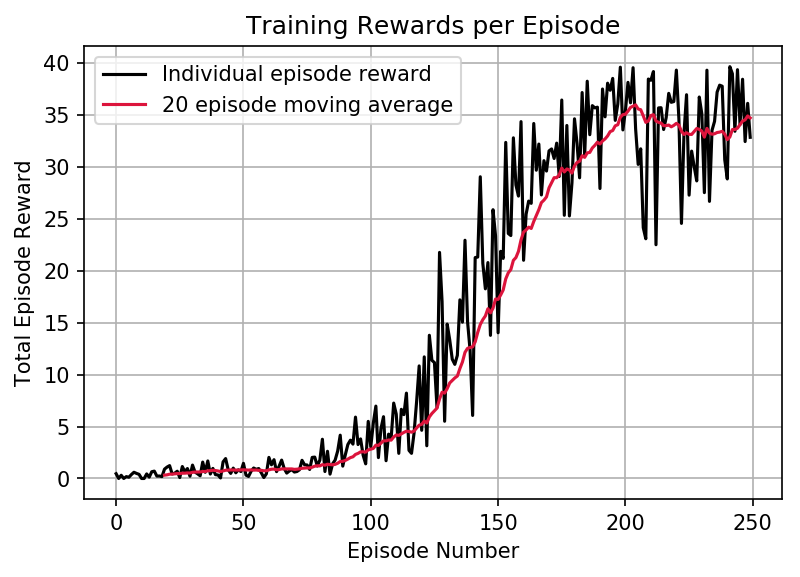

In [4]:
plt.title("Training Rewards per Episode")
plt.plot(train_scores,label = "Individual episode reward",color="black")
plt.plot(train_scores.rolling(20).mean(), label = "20 episode moving average",color="crimson")
plt.grid(True)
plt.xlabel("Episode Number")
plt.ylabel("Total Episode Reward")
plt.legend()


This final block checks if the agent has solved the environment and creates a graph showing the training scores averaged over $100$ consecutive episodes as well as the $\gt30$ threshold.

Environment solved after 236 training episodes.


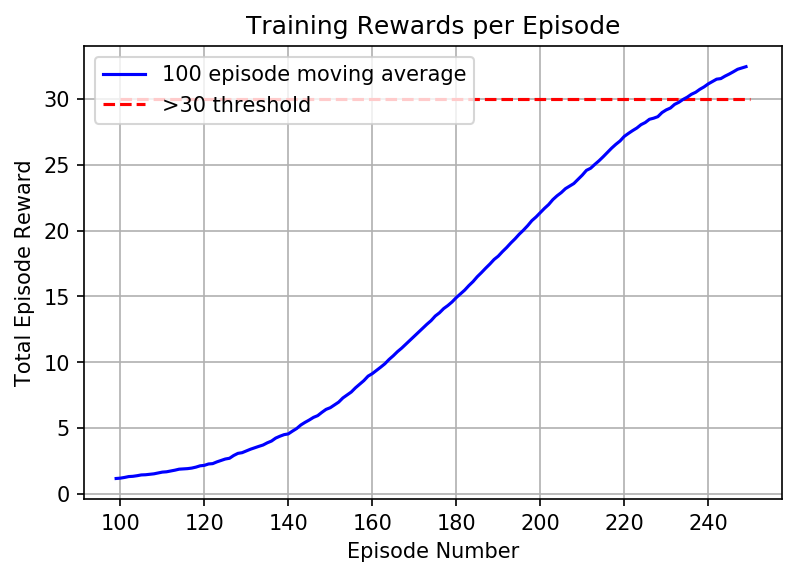

In [5]:
time_avg_scores = train_scores.rolling(100).mean()
check_solved(time_avg_scores)

plt.title("Training Rewards per Episode")
plt.plot(time_avg_scores, label = "100 episode moving average", color="b")
plt.hlines(30,100,len(train_scores),label=">30 threshold",linestyle="--",color="r")
plt.grid(True)
plt.xlabel("Episode Number")
plt.ylabel("Total Episode Reward")
plt.legend()
